[Learning rate scheduler](https://sanghyu.tistory.com/113)

[Image Data Augmentation](http://incredible.ai/pytorch/2020/04/25/Pytorch-Image-Augmentation/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
from torchsummary import summary

import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torch.utils.data import random_split

from utils import train, test

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
transform_train = transforms.Compose([transforms.ToTensor()])
transform_test = transforms.Compose([transforms.ToTensor()])

dataset = CIFAR10(root='./', train=True, download=True, transform=transform_train)
testset = CIFAR10(root='./', train=False, download=True, transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_num = int(len(dataset)*0.9)
valid_num = len(dataset) - train_num

trainset, validset = random_split(dataset, [train_num, valid_num])

In [5]:
batch_size = 128
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=6)
validloader = DataLoader(validset, batch_size=batch_size, shuffle=False, num_workers=6)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=6)

In [6]:
from models import MobileNet

In [7]:
model = MobileNet(channels=[16,16,32,64,128]).to(device)
summary(model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]           2,352
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]             144
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 16, 32, 32]             256
       BatchNorm2d-8           [-1, 16, 32, 32]              32
              ReLU-9           [-1, 16, 32, 32]               0
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]             144
      BatchNorm2d-12           [-1, 16, 16, 16]              32
             ReLU-13           [-1, 16, 16, 16]               0
           Conv2d-14           [-1, 32,

In [9]:
def lr_schedule(epoch, gamma=0.1):
    if epoch < 15:
        return 0.95**epoch
    elif 15 <= epoch < 30:
        return (gamma)*(0.95**epoch)
    elif 30 <= epoch < 45:
        return (gamma**2)*(0.95**epoch)
    elif 45 <= epoch < 60:
        return (gamma**3)*(0.95**epoch)
    elif 60 <= epoch < 90:
        return (gamma**4)*(0.95**epoch)
    elif 90 <= epoch < 105:
        return (gamma**5)*(0.95**epoch)
    else:
        return (gamma**6)*(0.95**epoch)

In [11]:
loss_ftn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0001)
scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                        lr_lambda=lambda epoch: lr_schedule(epoch) ,
                                        last_epoch=-1,
                                        verbose=True)

# scheduler12 = optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=5, gamma=0.1, verbose=True)

Adjusting learning rate of group 0 to 1.0000e-02.


In [12]:
EPOCHS=90

losses, accs, valid_losses, valid_accs = train(model, trainloader, validloader, EPOCHS, device, 
                                               loss_ftn, optimizer, scheduler=scheduler)

352it [00:05, 67.65it/s]


EPOCH 1 Completed. 
 Training Loss: 1.521, Training Accuracy: 45.07, Validation Loss: 1.301, Validation Accuracy: 54.18 

Adjusting learning rate of group 0 to 9.5000e-03.


352it [00:05, 66.98it/s]


EPOCH 2 Completed. 
 Training Loss: 1.154, Training Accuracy: 58.84, Validation Loss: 1.142, Validation Accuracy: 60.34 

Adjusting learning rate of group 0 to 9.0250e-03.


352it [00:05, 67.91it/s]


EPOCH 3 Completed. 
 Training Loss: 1.021, Training Accuracy: 63.64, Validation Loss: 1.030, Validation Accuracy: 64.10 

Adjusting learning rate of group 0 to 8.5737e-03.


352it [00:05, 68.07it/s]


EPOCH 4 Completed. 
 Training Loss: 0.948, Training Accuracy: 66.28, Validation Loss: 0.941, Validation Accuracy: 67.38 

Adjusting learning rate of group 0 to 8.1451e-03.


352it [00:05, 68.98it/s]


EPOCH 5 Completed. 
 Training Loss: 0.895, Training Accuracy: 68.23, Validation Loss: 0.911, Validation Accuracy: 67.92 

Adjusting learning rate of group 0 to 7.7378e-03.


352it [00:05, 64.57it/s]


EPOCH 6 Completed. 
 Training Loss: 0.850, Training Accuracy: 69.86, Validation Loss: 0.904, Validation Accuracy: 68.94 

Adjusting learning rate of group 0 to 7.3509e-03.


352it [00:05, 66.51it/s]


EPOCH 7 Completed. 
 Training Loss: 0.812, Training Accuracy: 71.27, Validation Loss: 0.862, Validation Accuracy: 69.74 

Adjusting learning rate of group 0 to 6.9834e-03.


352it [00:05, 63.76it/s]


EPOCH 8 Completed. 
 Training Loss: 0.786, Training Accuracy: 72.27, Validation Loss: 0.856, Validation Accuracy: 70.00 

Adjusting learning rate of group 0 to 6.6342e-03.


352it [00:05, 65.31it/s]


EPOCH 9 Completed. 
 Training Loss: 0.756, Training Accuracy: 73.23, Validation Loss: 0.845, Validation Accuracy: 70.44 

Adjusting learning rate of group 0 to 6.3025e-03.


352it [00:05, 69.01it/s]


EPOCH 10 Completed. 
 Training Loss: 0.732, Training Accuracy: 74.33, Validation Loss: 0.817, Validation Accuracy: 71.74 

Adjusting learning rate of group 0 to 5.9874e-03.


352it [00:04, 70.80it/s]


EPOCH 11 Completed. 
 Training Loss: 0.709, Training Accuracy: 74.98, Validation Loss: 0.817, Validation Accuracy: 71.72 

Adjusting learning rate of group 0 to 5.6880e-03.


352it [00:05, 66.81it/s]


EPOCH 12 Completed. 
 Training Loss: 0.687, Training Accuracy: 75.91, Validation Loss: 0.802, Validation Accuracy: 72.02 

Adjusting learning rate of group 0 to 5.4036e-03.


352it [00:05, 66.70it/s]


EPOCH 13 Completed. 
 Training Loss: 0.669, Training Accuracy: 76.36, Validation Loss: 0.773, Validation Accuracy: 73.42 

Adjusting learning rate of group 0 to 5.1334e-03.


352it [00:05, 68.42it/s]


EPOCH 14 Completed. 
 Training Loss: 0.650, Training Accuracy: 77.18, Validation Loss: 0.788, Validation Accuracy: 72.44 

Adjusting learning rate of group 0 to 4.8767e-03.


352it [00:05, 66.09it/s]


EPOCH 15 Completed. 
 Training Loss: 0.634, Training Accuracy: 77.52, Validation Loss: 0.769, Validation Accuracy: 73.34 

Adjusting learning rate of group 0 to 4.6329e-04.


352it [00:05, 66.51it/s]


EPOCH 16 Completed. 
 Training Loss: 0.539, Training Accuracy: 81.16, Validation Loss: 0.716, Validation Accuracy: 75.38 

Adjusting learning rate of group 0 to 4.4013e-04.


352it [00:05, 69.81it/s]


EPOCH 17 Completed. 
 Training Loss: 0.511, Training Accuracy: 82.22, Validation Loss: 0.718, Validation Accuracy: 75.48 

Adjusting learning rate of group 0 to 4.1812e-04.


352it [00:04, 77.84it/s]


EPOCH 18 Completed. 
 Training Loss: 0.495, Training Accuracy: 82.64, Validation Loss: 0.722, Validation Accuracy: 74.98 

Adjusting learning rate of group 0 to 3.9721e-04.


352it [00:03, 90.25it/s]


EPOCH 19 Completed. 
 Training Loss: 0.488, Training Accuracy: 82.98, Validation Loss: 0.720, Validation Accuracy: 75.28 

Adjusting learning rate of group 0 to 3.7735e-04.


352it [00:05, 61.03it/s]


EPOCH 20 Completed. 
 Training Loss: 0.478, Training Accuracy: 83.31, Validation Loss: 0.726, Validation Accuracy: 75.12 

Adjusting learning rate of group 0 to 3.5849e-04.


352it [00:06, 58.32it/s]


EPOCH 21 Completed. 
 Training Loss: 0.473, Training Accuracy: 83.37, Validation Loss: 0.735, Validation Accuracy: 75.12 

Adjusting learning rate of group 0 to 3.4056e-04.


352it [00:06, 57.53it/s]


EPOCH 22 Completed. 
 Training Loss: 0.467, Training Accuracy: 83.68, Validation Loss: 0.734, Validation Accuracy: 75.18 

Adjusting learning rate of group 0 to 3.2353e-04.


352it [00:06, 56.95it/s]


EPOCH 23 Completed. 
 Training Loss: 0.461, Training Accuracy: 83.80, Validation Loss: 0.739, Validation Accuracy: 74.86 

Adjusting learning rate of group 0 to 3.0736e-04.


352it [00:06, 57.40it/s]


EPOCH 24 Completed. 
 Training Loss: 0.457, Training Accuracy: 84.03, Validation Loss: 0.740, Validation Accuracy: 75.26 

Adjusting learning rate of group 0 to 2.9199e-04.


352it [00:06, 56.57it/s]


EPOCH 25 Completed. 
 Training Loss: 0.450, Training Accuracy: 84.18, Validation Loss: 0.742, Validation Accuracy: 75.44 

Adjusting learning rate of group 0 to 2.7739e-04.


352it [00:06, 56.30it/s]


EPOCH 26 Completed. 
 Training Loss: 0.448, Training Accuracy: 84.27, Validation Loss: 0.744, Validation Accuracy: 75.20 

Adjusting learning rate of group 0 to 2.6352e-04.


352it [00:06, 57.80it/s]


EPOCH 27 Completed. 
 Training Loss: 0.443, Training Accuracy: 84.26, Validation Loss: 0.752, Validation Accuracy: 75.16 

Adjusting learning rate of group 0 to 2.5034e-04.


352it [00:06, 57.20it/s]


EPOCH 28 Completed. 
 Training Loss: 0.439, Training Accuracy: 84.54, Validation Loss: 0.750, Validation Accuracy: 74.96 

Adjusting learning rate of group 0 to 2.3783e-04.


352it [00:06, 57.96it/s]


EPOCH 29 Completed. 
 Training Loss: 0.436, Training Accuracy: 84.65, Validation Loss: 0.756, Validation Accuracy: 74.80 

Adjusting learning rate of group 0 to 2.2594e-04.


352it [00:06, 57.68it/s]


EPOCH 30 Completed. 
 Training Loss: 0.434, Training Accuracy: 84.72, Validation Loss: 0.758, Validation Accuracy: 74.64 

Adjusting learning rate of group 0 to 2.1464e-05.


352it [00:06, 57.33it/s]


EPOCH 31 Completed. 
 Training Loss: 0.422, Training Accuracy: 85.13, Validation Loss: 0.757, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 2.0391e-05.


352it [00:06, 56.46it/s]


EPOCH 32 Completed. 
 Training Loss: 0.424, Training Accuracy: 85.06, Validation Loss: 0.758, Validation Accuracy: 74.78 

Adjusting learning rate of group 0 to 1.9371e-05.


352it [00:06, 57.28it/s]


EPOCH 33 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.39, Validation Loss: 0.758, Validation Accuracy: 74.74 

Adjusting learning rate of group 0 to 1.8403e-05.


352it [00:06, 57.18it/s]


EPOCH 34 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.34, Validation Loss: 0.758, Validation Accuracy: 74.74 

Adjusting learning rate of group 0 to 1.7482e-05.


352it [00:06, 55.74it/s]


EPOCH 35 Completed. 
 Training Loss: 0.423, Training Accuracy: 85.10, Validation Loss: 0.758, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.6608e-05.


352it [00:06, 56.91it/s]


EPOCH 36 Completed. 
 Training Loss: 0.421, Training Accuracy: 85.29, Validation Loss: 0.758, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.5778e-05.


352it [00:06, 56.07it/s]


EPOCH 37 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.28, Validation Loss: 0.758, Validation Accuracy: 74.74 

Adjusting learning rate of group 0 to 1.4989e-05.


352it [00:06, 56.76it/s]


EPOCH 38 Completed. 
 Training Loss: 0.423, Training Accuracy: 85.22, Validation Loss: 0.759, Validation Accuracy: 74.68 

Adjusting learning rate of group 0 to 1.4240e-05.


352it [00:06, 57.16it/s]


EPOCH 39 Completed. 
 Training Loss: 0.421, Training Accuracy: 85.14, Validation Loss: 0.759, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 1.3528e-05.


352it [00:06, 58.61it/s]


EPOCH 40 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.37, Validation Loss: 0.759, Validation Accuracy: 74.74 

Adjusting learning rate of group 0 to 1.2851e-05.


352it [00:06, 56.40it/s]


EPOCH 41 Completed. 
 Training Loss: 0.422, Training Accuracy: 85.08, Validation Loss: 0.759, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 1.2209e-05.


352it [00:06, 57.47it/s]


EPOCH 42 Completed. 
 Training Loss: 0.423, Training Accuracy: 85.24, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.1598e-05.


352it [00:06, 56.35it/s]


EPOCH 43 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.43, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 1.1018e-05.


352it [00:06, 57.37it/s]


EPOCH 44 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.33, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 1.0467e-05.


352it [00:06, 57.32it/s]


EPOCH 45 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.44, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 9.9440e-07.


352it [00:05, 59.45it/s]


EPOCH 46 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.33, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 9.4468e-07.


352it [00:05, 63.70it/s]


EPOCH 47 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.29, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 8.9745e-07.


352it [00:05, 68.39it/s]


EPOCH 48 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.42, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 8.5258e-07.


352it [00:05, 69.27it/s]


EPOCH 49 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.34, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 8.0995e-07.


352it [00:05, 69.21it/s]


EPOCH 50 Completed. 
 Training Loss: 0.418, Training Accuracy: 85.37, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 7.6945e-07.


352it [00:05, 68.02it/s]


EPOCH 51 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.26, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 7.3098e-07.


352it [00:05, 67.23it/s]


EPOCH 52 Completed. 
 Training Loss: 0.417, Training Accuracy: 85.46, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 6.9443e-07.


352it [00:05, 65.78it/s]


EPOCH 53 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.22, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 6.5971e-07.


352it [00:05, 68.00it/s]


EPOCH 54 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.48, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 6.2672e-07.


352it [00:05, 66.73it/s]


EPOCH 55 Completed. 
 Training Loss: 0.418, Training Accuracy: 85.34, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 5.9539e-07.


352it [00:05, 66.44it/s]


EPOCH 56 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.17, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 5.6562e-07.


352it [00:05, 67.84it/s]


EPOCH 57 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.25, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 5.3734e-07.


352it [00:05, 67.63it/s]


EPOCH 58 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.18, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 5.1047e-07.


352it [00:05, 66.95it/s]


EPOCH 59 Completed. 
 Training Loss: 0.421, Training Accuracy: 85.31, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 4.8495e-07.


352it [00:05, 67.21it/s]


EPOCH 60 Completed. 
 Training Loss: 0.417, Training Accuracy: 85.47, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 4.6070e-08.


352it [00:05, 68.01it/s]


EPOCH 61 Completed. 
 Training Loss: 0.418, Training Accuracy: 85.23, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 4.3766e-08.


352it [00:05, 67.88it/s]


EPOCH 62 Completed. 
 Training Loss: 0.418, Training Accuracy: 85.34, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 4.1578e-08.


352it [00:05, 69.03it/s]


EPOCH 63 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.32, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 3.9499e-08.


352it [00:04, 70.54it/s]


EPOCH 64 Completed. 
 Training Loss: 0.421, Training Accuracy: 85.36, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 3.7524e-08.


352it [00:03, 92.20it/s]


EPOCH 65 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.31, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 3.5648e-08.


352it [00:04, 74.55it/s]


EPOCH 66 Completed. 
 Training Loss: 0.417, Training Accuracy: 85.24, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 3.3866e-08.


352it [00:06, 57.16it/s]


EPOCH 67 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.21, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 3.2172e-08.


352it [00:06, 58.16it/s]


EPOCH 68 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.16, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 3.0564e-08.


352it [00:06, 56.54it/s]


EPOCH 69 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.30, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 2.9035e-08.


352it [00:06, 56.80it/s]


EPOCH 70 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.34, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 2.7584e-08.


352it [00:06, 57.70it/s]


EPOCH 71 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.36, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 2.6205e-08.


352it [00:06, 56.75it/s]


EPOCH 72 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.28, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 2.4894e-08.


352it [00:06, 56.39it/s]


EPOCH 73 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.38, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 2.3650e-08.


352it [00:06, 56.34it/s]


EPOCH 74 Completed. 
 Training Loss: 0.417, Training Accuracy: 85.39, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 2.2467e-08.


352it [00:06, 56.77it/s]


EPOCH 75 Completed. 
 Training Loss: 0.418, Training Accuracy: 85.51, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 2.1344e-08.


352it [00:06, 57.42it/s]


EPOCH 76 Completed. 
 Training Loss: 0.418, Training Accuracy: 85.31, Validation Loss: 0.760, Validation Accuracy: 74.72 

Adjusting learning rate of group 0 to 2.0277e-08.


352it [00:06, 57.05it/s]


EPOCH 77 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.33, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.9263e-08.


352it [00:06, 58.45it/s]


EPOCH 78 Completed. 
 Training Loss: 0.421, Training Accuracy: 85.30, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.8300e-08.


352it [00:06, 57.43it/s]


EPOCH 79 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.27, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.7385e-08.


352it [00:06, 56.18it/s]


EPOCH 80 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.31, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.6515e-08.


352it [00:06, 57.06it/s]


EPOCH 81 Completed. 
 Training Loss: 0.418, Training Accuracy: 85.46, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.5690e-08.


352it [00:06, 56.04it/s]


EPOCH 82 Completed. 
 Training Loss: 0.422, Training Accuracy: 85.25, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.4905e-08.


352it [00:06, 56.34it/s]


EPOCH 83 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.34, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.4160e-08.


352it [00:06, 57.06it/s]


EPOCH 84 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.26, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.3452e-08.


352it [00:06, 56.42it/s]


EPOCH 85 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.26, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.2779e-08.


352it [00:06, 57.10it/s]


EPOCH 86 Completed. 
 Training Loss: 0.420, Training Accuracy: 85.22, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.2140e-08.


352it [00:06, 57.96it/s]


EPOCH 87 Completed. 
 Training Loss: 0.418, Training Accuracy: 85.50, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.1533e-08.


352it [00:06, 57.58it/s]


EPOCH 88 Completed. 
 Training Loss: 0.419, Training Accuracy: 85.29, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.0957e-08.


352it [00:06, 57.04it/s]


EPOCH 89 Completed. 
 Training Loss: 0.421, Training Accuracy: 85.28, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 1.0409e-08.


352it [00:06, 56.72it/s]


EPOCH 90 Completed. 
 Training Loss: 0.418, Training Accuracy: 85.27, Validation Loss: 0.760, Validation Accuracy: 74.70 

Adjusting learning rate of group 0 to 9.8884e-10.


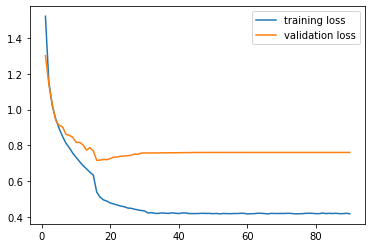

In [13]:
plt.figure()
plt.plot(np.arange(1,EPOCHS+1), losses, label='training loss')
plt.plot(np.arange(1,EPOCHS+1), valid_losses, label='validation loss')
plt.legend()
plt.show()

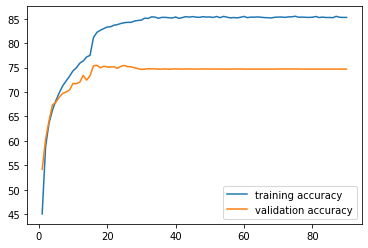

In [14]:
plt.figure()
plt.plot(np.arange(1,EPOCHS+1), accs, label='training accuracy')
plt.plot(np.arange(1,EPOCHS+1), valid_accs, label='validation accuracy')
plt.legend()
plt.show()

In [15]:
test(model, testloader, device)

Accuracy of the network on 10000 test images: 75.27 %


In [16]:
from models import MobileNet2

In [17]:
model2 = MobileNet2(channels=[16,16,32,64,128]).to(device)

In [18]:
summary(model2, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]           2,352
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]             144
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 16, 32, 32]             256
       BatchNorm2d-8           [-1, 16, 32, 32]              32
              ReLU-9           [-1, 16, 32, 32]               0
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]             144
      BatchNorm2d-12           [-1, 16, 16, 16]              32
             ReLU-13           [-1, 16, 16, 16]               0
           Conv2d-14           [-1, 32,

In [19]:
loss_ftn = nn.CrossEntropyLoss()

optimizer2 = optim.Adam(model2.parameters(), lr=0.01, weight_decay=0.0001)

scheduler2 = optim.lr_scheduler.LambdaLR(optimizer=optimizer2,
                                        lr_lambda=lambda epoch: lr_schedule(epoch) ,
                                        last_epoch=-1,
                                        verbose=True)

# scheduler2 = optim.lr_scheduler.LambdaLR(optimizer=optimizer2,
#                                         lr_lambda=lambda epoch: 0.95 ** epoch,
#                                         last_epoch=-1,
#                                         verbose=True)
# scheduler2 = optim.lr_scheduler.StepLR(optimizer=optimizer2, step_size=10, gamma=0.3, verbose=True)

Adjusting learning rate of group 0 to 1.0000e-02.


In [20]:
EPOCHS=90

losses2, accs2, valid_losses2, valid_accs2 = train(model2, trainloader, validloader, EPOCHS, device, 
                                               loss_ftn, optimizer2, scheduler=scheduler2)

352it [00:05, 63.17it/s]


EPOCH 1 Completed. 
 Training Loss: 1.560, Training Accuracy: 43.08, Validation Loss: 1.358, Validation Accuracy: 51.44 

Adjusting learning rate of group 0 to 9.5000e-03.


352it [00:05, 67.61it/s]


EPOCH 2 Completed. 
 Training Loss: 1.206, Training Accuracy: 56.58, Validation Loss: 1.123, Validation Accuracy: 60.68 

Adjusting learning rate of group 0 to 9.0250e-03.


352it [00:05, 67.75it/s]


EPOCH 3 Completed. 
 Training Loss: 1.049, Training Accuracy: 62.39, Validation Loss: 1.048, Validation Accuracy: 63.62 

Adjusting learning rate of group 0 to 8.5737e-03.


352it [00:05, 64.72it/s]


EPOCH 4 Completed. 
 Training Loss: 0.952, Training Accuracy: 66.24, Validation Loss: 0.976, Validation Accuracy: 66.40 

Adjusting learning rate of group 0 to 8.1451e-03.


352it [00:05, 64.92it/s]


EPOCH 5 Completed. 
 Training Loss: 0.890, Training Accuracy: 68.50, Validation Loss: 0.905, Validation Accuracy: 68.66 

Adjusting learning rate of group 0 to 7.7378e-03.


352it [00:05, 65.74it/s]


EPOCH 6 Completed. 
 Training Loss: 0.839, Training Accuracy: 70.37, Validation Loss: 0.893, Validation Accuracy: 69.16 

Adjusting learning rate of group 0 to 7.3509e-03.


352it [00:05, 67.98it/s]


EPOCH 7 Completed. 
 Training Loss: 0.798, Training Accuracy: 71.72, Validation Loss: 0.846, Validation Accuracy: 70.62 

Adjusting learning rate of group 0 to 6.9834e-03.


352it [00:05, 67.04it/s]


EPOCH 8 Completed. 
 Training Loss: 0.767, Training Accuracy: 72.97, Validation Loss: 0.829, Validation Accuracy: 71.18 

Adjusting learning rate of group 0 to 6.6342e-03.


352it [00:05, 62.06it/s]


EPOCH 9 Completed. 
 Training Loss: 0.732, Training Accuracy: 74.01, Validation Loss: 0.820, Validation Accuracy: 71.48 

Adjusting learning rate of group 0 to 6.3025e-03.


352it [00:04, 73.29it/s]


EPOCH 10 Completed. 
 Training Loss: 0.709, Training Accuracy: 75.05, Validation Loss: 0.807, Validation Accuracy: 72.04 

Adjusting learning rate of group 0 to 5.9874e-03.


352it [00:04, 85.13it/s]


EPOCH 11 Completed. 
 Training Loss: 0.677, Training Accuracy: 75.98, Validation Loss: 0.822, Validation Accuracy: 71.92 

Adjusting learning rate of group 0 to 5.6880e-03.


352it [00:05, 61.37it/s]


EPOCH 12 Completed. 
 Training Loss: 0.662, Training Accuracy: 76.69, Validation Loss: 0.819, Validation Accuracy: 72.06 

Adjusting learning rate of group 0 to 5.4036e-03.


352it [00:06, 56.83it/s]


EPOCH 13 Completed. 
 Training Loss: 0.637, Training Accuracy: 77.63, Validation Loss: 0.799, Validation Accuracy: 73.30 

Adjusting learning rate of group 0 to 5.1334e-03.


352it [00:06, 56.30it/s]


EPOCH 14 Completed. 
 Training Loss: 0.615, Training Accuracy: 78.26, Validation Loss: 0.797, Validation Accuracy: 73.44 

Adjusting learning rate of group 0 to 4.8767e-03.


352it [00:06, 55.87it/s]


EPOCH 15 Completed. 
 Training Loss: 0.595, Training Accuracy: 78.88, Validation Loss: 0.777, Validation Accuracy: 73.46 

Adjusting learning rate of group 0 to 4.6329e-04.


352it [00:06, 56.23it/s]


EPOCH 16 Completed. 
 Training Loss: 0.487, Training Accuracy: 83.12, Validation Loss: 0.751, Validation Accuracy: 75.14 

Adjusting learning rate of group 0 to 4.4013e-04.


352it [00:06, 55.86it/s]


EPOCH 17 Completed. 
 Training Loss: 0.452, Training Accuracy: 84.35, Validation Loss: 0.764, Validation Accuracy: 75.06 

Adjusting learning rate of group 0 to 4.1812e-04.


352it [00:06, 56.16it/s]


EPOCH 18 Completed. 
 Training Loss: 0.436, Training Accuracy: 84.84, Validation Loss: 0.772, Validation Accuracy: 74.92 

Adjusting learning rate of group 0 to 3.9721e-04.


352it [00:06, 55.60it/s]


EPOCH 19 Completed. 
 Training Loss: 0.427, Training Accuracy: 85.20, Validation Loss: 0.784, Validation Accuracy: 74.96 

Adjusting learning rate of group 0 to 3.7735e-04.


352it [00:06, 55.63it/s]


EPOCH 20 Completed. 
 Training Loss: 0.415, Training Accuracy: 85.72, Validation Loss: 0.793, Validation Accuracy: 74.60 

Adjusting learning rate of group 0 to 3.5849e-04.


352it [00:06, 56.57it/s]


EPOCH 21 Completed. 
 Training Loss: 0.406, Training Accuracy: 85.91, Validation Loss: 0.807, Validation Accuracy: 74.68 

Adjusting learning rate of group 0 to 3.4056e-04.


352it [00:06, 56.18it/s]


EPOCH 22 Completed. 
 Training Loss: 0.398, Training Accuracy: 86.20, Validation Loss: 0.816, Validation Accuracy: 74.50 

Adjusting learning rate of group 0 to 3.2353e-04.


352it [00:06, 55.27it/s]


EPOCH 23 Completed. 
 Training Loss: 0.394, Training Accuracy: 86.37, Validation Loss: 0.821, Validation Accuracy: 74.56 

Adjusting learning rate of group 0 to 3.0736e-04.


352it [00:06, 56.64it/s]


EPOCH 24 Completed. 
 Training Loss: 0.387, Training Accuracy: 86.75, Validation Loss: 0.830, Validation Accuracy: 74.66 

Adjusting learning rate of group 0 to 2.9199e-04.


352it [00:06, 55.86it/s]


EPOCH 25 Completed. 
 Training Loss: 0.381, Training Accuracy: 86.96, Validation Loss: 0.834, Validation Accuracy: 74.46 

Adjusting learning rate of group 0 to 2.7739e-04.


352it [00:06, 56.40it/s]


EPOCH 26 Completed. 
 Training Loss: 0.378, Training Accuracy: 86.88, Validation Loss: 0.843, Validation Accuracy: 74.62 

Adjusting learning rate of group 0 to 2.6352e-04.


352it [00:06, 56.35it/s]


EPOCH 27 Completed. 
 Training Loss: 0.373, Training Accuracy: 87.14, Validation Loss: 0.850, Validation Accuracy: 74.42 

Adjusting learning rate of group 0 to 2.5034e-04.


352it [00:06, 55.42it/s]


EPOCH 28 Completed. 
 Training Loss: 0.369, Training Accuracy: 87.34, Validation Loss: 0.851, Validation Accuracy: 74.44 

Adjusting learning rate of group 0 to 2.3783e-04.


352it [00:06, 55.98it/s]


EPOCH 29 Completed. 
 Training Loss: 0.367, Training Accuracy: 87.22, Validation Loss: 0.858, Validation Accuracy: 74.52 

Adjusting learning rate of group 0 to 2.2594e-04.


352it [00:06, 56.29it/s]


EPOCH 30 Completed. 
 Training Loss: 0.364, Training Accuracy: 87.52, Validation Loss: 0.861, Validation Accuracy: 74.24 

Adjusting learning rate of group 0 to 2.1464e-05.


352it [00:06, 55.64it/s]


EPOCH 31 Completed. 
 Training Loss: 0.352, Training Accuracy: 87.96, Validation Loss: 0.862, Validation Accuracy: 74.42 

Adjusting learning rate of group 0 to 2.0391e-05.


352it [00:06, 56.71it/s]


EPOCH 32 Completed. 
 Training Loss: 0.351, Training Accuracy: 87.87, Validation Loss: 0.863, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 1.9371e-05.


352it [00:06, 56.56it/s]


EPOCH 33 Completed. 
 Training Loss: 0.353, Training Accuracy: 87.85, Validation Loss: 0.864, Validation Accuracy: 74.32 

Adjusting learning rate of group 0 to 1.8403e-05.


352it [00:06, 56.98it/s]


EPOCH 34 Completed. 
 Training Loss: 0.350, Training Accuracy: 87.91, Validation Loss: 0.865, Validation Accuracy: 74.32 

Adjusting learning rate of group 0 to 1.7482e-05.


352it [00:06, 55.96it/s]


EPOCH 35 Completed. 
 Training Loss: 0.349, Training Accuracy: 87.99, Validation Loss: 0.865, Validation Accuracy: 74.28 

Adjusting learning rate of group 0 to 1.6608e-05.


352it [00:06, 55.85it/s]


EPOCH 36 Completed. 
 Training Loss: 0.349, Training Accuracy: 88.07, Validation Loss: 0.865, Validation Accuracy: 74.28 

Adjusting learning rate of group 0 to 1.5778e-05.


352it [00:06, 56.63it/s]


EPOCH 37 Completed. 
 Training Loss: 0.349, Training Accuracy: 88.10, Validation Loss: 0.866, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 1.4989e-05.


352it [00:05, 62.48it/s]


EPOCH 38 Completed. 
 Training Loss: 0.347, Training Accuracy: 88.04, Validation Loss: 0.866, Validation Accuracy: 74.28 

Adjusting learning rate of group 0 to 1.4240e-05.


352it [00:05, 65.62it/s]


EPOCH 39 Completed. 
 Training Loss: 0.350, Training Accuracy: 88.02, Validation Loss: 0.867, Validation Accuracy: 74.32 

Adjusting learning rate of group 0 to 1.3528e-05.


352it [00:05, 64.39it/s]


EPOCH 40 Completed. 
 Training Loss: 0.348, Training Accuracy: 87.96, Validation Loss: 0.867, Validation Accuracy: 74.36 

Adjusting learning rate of group 0 to 1.2851e-05.


352it [00:05, 65.96it/s]


EPOCH 41 Completed. 
 Training Loss: 0.348, Training Accuracy: 88.10, Validation Loss: 0.867, Validation Accuracy: 74.34 

Adjusting learning rate of group 0 to 1.2209e-05.


352it [00:05, 64.91it/s]


EPOCH 42 Completed. 
 Training Loss: 0.347, Training Accuracy: 88.14, Validation Loss: 0.867, Validation Accuracy: 74.32 

Adjusting learning rate of group 0 to 1.1598e-05.


352it [00:05, 65.81it/s]


EPOCH 43 Completed. 
 Training Loss: 0.346, Training Accuracy: 88.14, Validation Loss: 0.868, Validation Accuracy: 74.34 

Adjusting learning rate of group 0 to 1.1018e-05.


352it [00:05, 66.59it/s]


EPOCH 44 Completed. 
 Training Loss: 0.348, Training Accuracy: 88.05, Validation Loss: 0.868, Validation Accuracy: 74.34 

Adjusting learning rate of group 0 to 1.0467e-05.


352it [00:05, 67.26it/s]


EPOCH 45 Completed. 
 Training Loss: 0.347, Training Accuracy: 88.09, Validation Loss: 0.868, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 9.9440e-07.


352it [00:05, 63.78it/s]


EPOCH 46 Completed. 
 Training Loss: 0.346, Training Accuracy: 88.17, Validation Loss: 0.868, Validation Accuracy: 74.32 

Adjusting learning rate of group 0 to 9.4468e-07.


352it [00:05, 65.48it/s]


EPOCH 47 Completed. 
 Training Loss: 0.345, Training Accuracy: 88.23, Validation Loss: 0.868, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 8.9745e-07.


352it [00:05, 67.19it/s]


EPOCH 48 Completed. 
 Training Loss: 0.345, Training Accuracy: 88.25, Validation Loss: 0.868, Validation Accuracy: 74.32 

Adjusting learning rate of group 0 to 8.5258e-07.


352it [00:05, 70.19it/s]


EPOCH 49 Completed. 
 Training Loss: 0.345, Training Accuracy: 88.22, Validation Loss: 0.868, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 8.0995e-07.


352it [00:05, 67.26it/s]


EPOCH 50 Completed. 
 Training Loss: 0.346, Training Accuracy: 88.12, Validation Loss: 0.869, Validation Accuracy: 74.32 

Adjusting learning rate of group 0 to 7.6945e-07.


352it [00:05, 63.13it/s]


EPOCH 51 Completed. 
 Training Loss: 0.348, Training Accuracy: 88.13, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 7.3098e-07.


352it [00:05, 67.09it/s]


EPOCH 52 Completed. 
 Training Loss: 0.344, Training Accuracy: 88.35, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 6.9443e-07.


352it [00:05, 69.91it/s]


EPOCH 53 Completed. 
 Training Loss: 0.348, Training Accuracy: 88.25, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 6.5971e-07.


352it [00:05, 65.11it/s]


EPOCH 54 Completed. 
 Training Loss: 0.346, Training Accuracy: 88.24, Validation Loss: 0.869, Validation Accuracy: 74.32 

Adjusting learning rate of group 0 to 6.2672e-07.


352it [00:05, 67.89it/s]


EPOCH 55 Completed. 
 Training Loss: 0.348, Training Accuracy: 88.18, Validation Loss: 0.869, Validation Accuracy: 74.32 

Adjusting learning rate of group 0 to 5.9539e-07.


352it [00:03, 89.75it/s]


EPOCH 56 Completed. 
 Training Loss: 0.344, Training Accuracy: 88.32, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 5.6562e-07.


352it [00:05, 69.78it/s]


EPOCH 57 Completed. 
 Training Loss: 0.347, Training Accuracy: 88.09, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 5.3734e-07.


352it [00:06, 56.43it/s]


EPOCH 58 Completed. 
 Training Loss: 0.345, Training Accuracy: 88.19, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 5.1047e-07.


352it [00:06, 55.92it/s]


EPOCH 59 Completed. 
 Training Loss: 0.345, Training Accuracy: 88.21, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 4.8495e-07.


352it [00:06, 56.92it/s]


EPOCH 60 Completed. 
 Training Loss: 0.347, Training Accuracy: 88.15, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 4.6070e-08.


352it [00:06, 56.75it/s]


EPOCH 61 Completed. 
 Training Loss: 0.346, Training Accuracy: 88.14, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 4.3766e-08.


352it [00:06, 55.66it/s]


EPOCH 62 Completed. 
 Training Loss: 0.347, Training Accuracy: 88.12, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 4.1578e-08.


352it [00:06, 56.38it/s]


EPOCH 63 Completed. 
 Training Loss: 0.346, Training Accuracy: 88.32, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 3.9499e-08.


352it [00:06, 55.59it/s]


EPOCH 64 Completed. 
 Training Loss: 0.348, Training Accuracy: 88.10, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 3.7524e-08.


352it [00:06, 55.54it/s]


EPOCH 65 Completed. 
 Training Loss: 0.345, Training Accuracy: 88.22, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 3.5648e-08.


352it [00:06, 56.22it/s]


EPOCH 66 Completed. 
 Training Loss: 0.347, Training Accuracy: 88.13, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 3.3866e-08.


352it [00:06, 55.62it/s]


EPOCH 67 Completed. 
 Training Loss: 0.346, Training Accuracy: 88.12, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 3.2172e-08.


352it [00:06, 56.84it/s]


EPOCH 68 Completed. 
 Training Loss: 0.347, Training Accuracy: 88.15, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 3.0564e-08.


352it [00:06, 56.84it/s]


EPOCH 69 Completed. 
 Training Loss: 0.345, Training Accuracy: 88.19, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 2.9035e-08.


352it [00:06, 56.19it/s]


EPOCH 70 Completed. 
 Training Loss: 0.346, Training Accuracy: 88.21, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 2.7584e-08.


352it [00:06, 56.19it/s]


EPOCH 71 Completed. 
 Training Loss: 0.346, Training Accuracy: 88.15, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 2.6205e-08.


352it [00:06, 55.69it/s]


EPOCH 72 Completed. 
 Training Loss: 0.347, Training Accuracy: 88.07, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 2.4894e-08.


352it [00:06, 56.57it/s]


EPOCH 73 Completed. 
 Training Loss: 0.347, Training Accuracy: 87.96, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 2.3650e-08.


352it [00:06, 56.87it/s]


EPOCH 74 Completed. 
 Training Loss: 0.345, Training Accuracy: 88.20, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 2.2467e-08.


352it [00:06, 55.72it/s]


EPOCH 75 Completed. 
 Training Loss: 0.345, Training Accuracy: 88.22, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 2.1344e-08.


352it [00:06, 56.20it/s]


EPOCH 76 Completed. 
 Training Loss: 0.347, Training Accuracy: 88.08, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 2.0277e-08.


352it [00:06, 56.53it/s]


EPOCH 77 Completed. 
 Training Loss: 0.345, Training Accuracy: 88.17, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 1.9263e-08.


352it [00:06, 55.73it/s]


EPOCH 78 Completed. 
 Training Loss: 0.344, Training Accuracy: 88.23, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 1.8300e-08.


352it [00:06, 55.91it/s]


EPOCH 79 Completed. 
 Training Loss: 0.346, Training Accuracy: 88.21, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 1.7385e-08.


352it [00:06, 55.54it/s]


EPOCH 80 Completed. 
 Training Loss: 0.346, Training Accuracy: 88.05, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 1.6515e-08.


352it [00:06, 56.02it/s]


EPOCH 81 Completed. 
 Training Loss: 0.345, Training Accuracy: 88.20, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 1.5690e-08.


352it [00:06, 54.92it/s]


EPOCH 82 Completed. 
 Training Loss: 0.346, Training Accuracy: 88.20, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 1.4905e-08.


352it [00:05, 60.47it/s]


EPOCH 83 Completed. 
 Training Loss: 0.348, Training Accuracy: 88.06, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 1.4160e-08.


352it [00:05, 66.18it/s]


EPOCH 84 Completed. 
 Training Loss: 0.346, Training Accuracy: 88.17, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 1.3452e-08.


352it [00:05, 67.33it/s]


EPOCH 85 Completed. 
 Training Loss: 0.344, Training Accuracy: 88.29, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 1.2779e-08.


352it [00:05, 66.83it/s]


EPOCH 86 Completed. 
 Training Loss: 0.345, Training Accuracy: 88.16, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 1.2140e-08.


352it [00:05, 69.83it/s]


EPOCH 87 Completed. 
 Training Loss: 0.346, Training Accuracy: 88.14, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 1.1533e-08.


352it [00:05, 67.19it/s]


EPOCH 88 Completed. 
 Training Loss: 0.347, Training Accuracy: 88.07, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 1.0957e-08.


352it [00:05, 64.77it/s]


EPOCH 89 Completed. 
 Training Loss: 0.346, Training Accuracy: 88.19, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 1.0409e-08.


352it [00:05, 64.83it/s]


EPOCH 90 Completed. 
 Training Loss: 0.349, Training Accuracy: 87.96, Validation Loss: 0.869, Validation Accuracy: 74.30 

Adjusting learning rate of group 0 to 9.8884e-10.


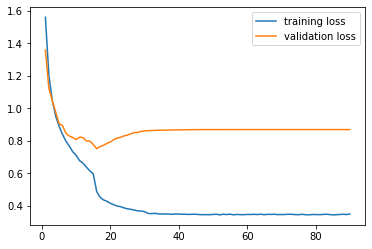

In [22]:
plt.figure()
plt.plot(np.arange(1,EPOCHS+1), losses2, label='training loss')
plt.plot(np.arange(1,EPOCHS+1), valid_losses2, label='validation loss')
plt.legend()
plt.show()

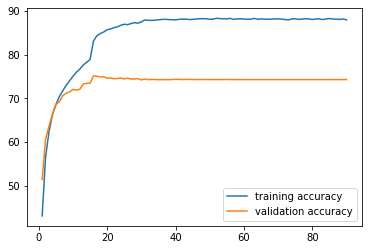

In [23]:
plt.figure()
plt.plot(np.arange(1,EPOCHS+1), accs2, label='training accuracy')
plt.plot(np.arange(1,EPOCHS+1), valid_accs2, label='validation accuracy')
plt.legend()
plt.show()

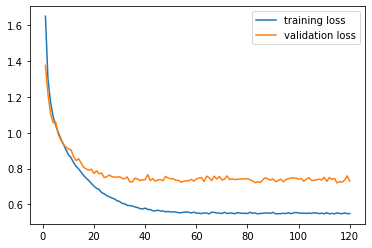

In [54]:
plt.figure()
plt.plot(np.arange(1,EPOCHS+1), losses3, label='training loss')
plt.plot(np.arange(1,EPOCHS+1), valid_losses3, label='validation loss')
plt.legend()
plt.show()

In [21]:
test(model2, testloader, device)

Accuracy of the network on 10000 test images: 74.19 %


In [24]:
from models import MobileNet3

In [25]:
model3 = MobileNet3(channels=[16,16,32,64,128]).to(device)

summary(model3, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]           2,352
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]             144
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 16, 32, 32]             256
       BatchNorm2d-8           [-1, 16, 32, 32]              32
              ReLU-9           [-1, 16, 32, 32]               0
        Dropout2d-10           [-1, 16, 32, 32]               0
        MaxPool2d-11           [-1, 16, 16, 16]               0
           Conv2d-12           [-1, 16, 16, 16]             144
      BatchNorm2d-13           [-1, 16, 16, 16]              32
             ReLU-14           [-1, 16,

In [26]:
loss_ftn = nn.CrossEntropyLoss()

optimizer3 = optim.Adam(model3.parameters(), lr=0.01, weight_decay=0.0001)

scheduler3 = optim.lr_scheduler.LambdaLR(optimizer=optimizer3,
                                        lr_lambda=lambda epoch: lr_schedule(epoch) ,
                                        last_epoch=-1,
                                        verbose=True)

Adjusting learning rate of group 0 to 1.0000e-02.


In [27]:
EPOCHS=90

losses3, accs3, valid_losses3, valid_accs3 = train(model3, trainloader, validloader, EPOCHS, device, 
                                               loss_ftn, optimizer3, scheduler=scheduler3)

352it [00:06, 56.85it/s]


EPOCH 1 Completed. 
 Training Loss: 1.804, Training Accuracy: 32.65, Validation Loss: 1.587, Validation Accuracy: 41.70 

Adjusting learning rate of group 0 to 9.5000e-03.


352it [00:06, 56.78it/s]


EPOCH 2 Completed. 
 Training Loss: 1.491, Training Accuracy: 44.59, Validation Loss: 1.434, Validation Accuracy: 48.22 

Adjusting learning rate of group 0 to 9.0250e-03.


352it [00:06, 58.00it/s]


EPOCH 3 Completed. 
 Training Loss: 1.366, Training Accuracy: 49.97, Validation Loss: 1.315, Validation Accuracy: 52.40 

Adjusting learning rate of group 0 to 8.5737e-03.


352it [00:06, 56.31it/s]


EPOCH 4 Completed. 
 Training Loss: 1.286, Training Accuracy: 53.19, Validation Loss: 1.278, Validation Accuracy: 53.12 

Adjusting learning rate of group 0 to 8.1451e-03.


352it [00:06, 56.43it/s]


EPOCH 5 Completed. 
 Training Loss: 1.223, Training Accuracy: 55.83, Validation Loss: 1.234, Validation Accuracy: 55.92 

Adjusting learning rate of group 0 to 7.7378e-03.


352it [00:06, 56.10it/s]


EPOCH 6 Completed. 
 Training Loss: 1.175, Training Accuracy: 57.74, Validation Loss: 1.198, Validation Accuracy: 57.02 

Adjusting learning rate of group 0 to 7.3509e-03.


352it [00:06, 55.78it/s]


EPOCH 7 Completed. 
 Training Loss: 1.153, Training Accuracy: 58.66, Validation Loss: 1.168, Validation Accuracy: 58.54 

Adjusting learning rate of group 0 to 6.9834e-03.


352it [00:06, 55.54it/s]


EPOCH 8 Completed. 
 Training Loss: 1.119, Training Accuracy: 59.65, Validation Loss: 1.153, Validation Accuracy: 58.68 

Adjusting learning rate of group 0 to 6.6342e-03.


352it [00:06, 56.31it/s]


EPOCH 9 Completed. 
 Training Loss: 1.101, Training Accuracy: 60.44, Validation Loss: 1.131, Validation Accuracy: 59.64 

Adjusting learning rate of group 0 to 6.3025e-03.


352it [00:05, 65.19it/s]


EPOCH 10 Completed. 
 Training Loss: 1.079, Training Accuracy: 61.27, Validation Loss: 1.102, Validation Accuracy: 60.70 

Adjusting learning rate of group 0 to 5.9874e-03.


352it [00:05, 64.45it/s]


EPOCH 11 Completed. 
 Training Loss: 1.053, Training Accuracy: 62.31, Validation Loss: 1.082, Validation Accuracy: 61.84 

Adjusting learning rate of group 0 to 5.6880e-03.


352it [00:05, 65.90it/s]


EPOCH 12 Completed. 
 Training Loss: 1.037, Training Accuracy: 63.17, Validation Loss: 1.100, Validation Accuracy: 60.70 

Adjusting learning rate of group 0 to 5.4036e-03.


352it [00:05, 64.64it/s]


EPOCH 13 Completed. 
 Training Loss: 1.021, Training Accuracy: 63.59, Validation Loss: 1.056, Validation Accuracy: 62.56 

Adjusting learning rate of group 0 to 5.1334e-03.


352it [00:05, 66.27it/s]


EPOCH 14 Completed. 
 Training Loss: 1.008, Training Accuracy: 64.15, Validation Loss: 1.086, Validation Accuracy: 62.26 

Adjusting learning rate of group 0 to 4.8767e-03.


352it [00:05, 66.57it/s]


EPOCH 15 Completed. 
 Training Loss: 0.991, Training Accuracy: 64.76, Validation Loss: 1.050, Validation Accuracy: 63.50 

Adjusting learning rate of group 0 to 4.6329e-04.


352it [00:05, 66.49it/s]


EPOCH 16 Completed. 
 Training Loss: 0.938, Training Accuracy: 66.49, Validation Loss: 1.003, Validation Accuracy: 65.00 

Adjusting learning rate of group 0 to 4.4013e-04.


352it [00:05, 66.31it/s]


EPOCH 17 Completed. 
 Training Loss: 0.921, Training Accuracy: 66.97, Validation Loss: 0.990, Validation Accuracy: 65.26 

Adjusting learning rate of group 0 to 4.1812e-04.


352it [00:05, 66.31it/s]


EPOCH 18 Completed. 
 Training Loss: 0.911, Training Accuracy: 67.46, Validation Loss: 0.982, Validation Accuracy: 65.32 

Adjusting learning rate of group 0 to 3.9721e-04.


352it [00:05, 67.29it/s]


EPOCH 19 Completed. 
 Training Loss: 0.906, Training Accuracy: 67.84, Validation Loss: 0.986, Validation Accuracy: 65.78 

Adjusting learning rate of group 0 to 3.7735e-04.


352it [00:05, 65.59it/s]


EPOCH 20 Completed. 
 Training Loss: 0.900, Training Accuracy: 68.04, Validation Loss: 0.970, Validation Accuracy: 66.38 

Adjusting learning rate of group 0 to 3.5849e-04.


352it [00:05, 68.52it/s]


EPOCH 21 Completed. 
 Training Loss: 0.900, Training Accuracy: 67.92, Validation Loss: 0.985, Validation Accuracy: 66.48 

Adjusting learning rate of group 0 to 3.4056e-04.


352it [00:05, 64.12it/s]


EPOCH 22 Completed. 
 Training Loss: 0.895, Training Accuracy: 67.94, Validation Loss: 0.977, Validation Accuracy: 66.22 

Adjusting learning rate of group 0 to 3.2353e-04.


352it [00:05, 63.86it/s]


EPOCH 23 Completed. 
 Training Loss: 0.893, Training Accuracy: 68.31, Validation Loss: 0.959, Validation Accuracy: 66.30 

Adjusting learning rate of group 0 to 3.0736e-04.


352it [00:05, 66.05it/s]


EPOCH 24 Completed. 
 Training Loss: 0.890, Training Accuracy: 68.46, Validation Loss: 0.979, Validation Accuracy: 66.28 

Adjusting learning rate of group 0 to 2.9199e-04.


352it [00:05, 64.45it/s]


EPOCH 25 Completed. 
 Training Loss: 0.894, Training Accuracy: 68.24, Validation Loss: 0.980, Validation Accuracy: 66.56 

Adjusting learning rate of group 0 to 2.7739e-04.


352it [00:05, 66.50it/s]


EPOCH 26 Completed. 
 Training Loss: 0.885, Training Accuracy: 68.55, Validation Loss: 0.976, Validation Accuracy: 66.24 

Adjusting learning rate of group 0 to 2.6352e-04.


352it [00:04, 71.67it/s]


EPOCH 27 Completed. 
 Training Loss: 0.889, Training Accuracy: 68.11, Validation Loss: 0.970, Validation Accuracy: 66.18 

Adjusting learning rate of group 0 to 2.5034e-04.


352it [00:04, 84.47it/s]


EPOCH 28 Completed. 
 Training Loss: 0.881, Training Accuracy: 68.43, Validation Loss: 0.975, Validation Accuracy: 66.40 

Adjusting learning rate of group 0 to 2.3783e-04.


352it [00:05, 61.06it/s]


EPOCH 29 Completed. 
 Training Loss: 0.881, Training Accuracy: 68.62, Validation Loss: 0.955, Validation Accuracy: 66.76 

Adjusting learning rate of group 0 to 2.2594e-04.


352it [00:06, 55.70it/s]


EPOCH 30 Completed. 
 Training Loss: 0.878, Training Accuracy: 68.78, Validation Loss: 0.983, Validation Accuracy: 66.14 

Adjusting learning rate of group 0 to 2.1464e-05.


352it [00:06, 55.93it/s]


EPOCH 31 Completed. 
 Training Loss: 0.874, Training Accuracy: 68.84, Validation Loss: 0.965, Validation Accuracy: 66.16 

Adjusting learning rate of group 0 to 2.0391e-05.


352it [00:06, 56.49it/s]


EPOCH 32 Completed. 
 Training Loss: 0.878, Training Accuracy: 68.71, Validation Loss: 0.936, Validation Accuracy: 67.48 

Adjusting learning rate of group 0 to 1.9371e-05.


352it [00:06, 55.86it/s]


EPOCH 33 Completed. 
 Training Loss: 0.876, Training Accuracy: 68.56, Validation Loss: 0.956, Validation Accuracy: 66.48 

Adjusting learning rate of group 0 to 1.8403e-05.


352it [00:06, 56.39it/s]


EPOCH 34 Completed. 
 Training Loss: 0.874, Training Accuracy: 68.82, Validation Loss: 0.976, Validation Accuracy: 66.32 

Adjusting learning rate of group 0 to 1.7482e-05.


352it [00:06, 55.27it/s]


EPOCH 35 Completed. 
 Training Loss: 0.881, Training Accuracy: 68.61, Validation Loss: 0.981, Validation Accuracy: 66.12 

Adjusting learning rate of group 0 to 1.6608e-05.


352it [00:06, 55.99it/s]


EPOCH 36 Completed. 
 Training Loss: 0.872, Training Accuracy: 69.22, Validation Loss: 0.959, Validation Accuracy: 66.30 

Adjusting learning rate of group 0 to 1.5778e-05.


352it [00:06, 54.76it/s]


EPOCH 37 Completed. 
 Training Loss: 0.872, Training Accuracy: 68.92, Validation Loss: 0.963, Validation Accuracy: 66.58 

Adjusting learning rate of group 0 to 1.4989e-05.


352it [00:06, 55.65it/s]


EPOCH 38 Completed. 
 Training Loss: 0.875, Training Accuracy: 68.84, Validation Loss: 0.967, Validation Accuracy: 66.00 

Adjusting learning rate of group 0 to 1.4240e-05.


352it [00:06, 56.85it/s]


EPOCH 39 Completed. 
 Training Loss: 0.878, Training Accuracy: 68.69, Validation Loss: 0.975, Validation Accuracy: 66.38 

Adjusting learning rate of group 0 to 1.3528e-05.


352it [00:06, 54.22it/s]


EPOCH 40 Completed. 
 Training Loss: 0.876, Training Accuracy: 68.88, Validation Loss: 0.965, Validation Accuracy: 66.94 

Adjusting learning rate of group 0 to 1.2851e-05.


352it [00:06, 56.03it/s]


EPOCH 41 Completed. 
 Training Loss: 0.879, Training Accuracy: 68.56, Validation Loss: 0.983, Validation Accuracy: 67.02 

Adjusting learning rate of group 0 to 1.2209e-05.


352it [00:06, 56.28it/s]


EPOCH 42 Completed. 
 Training Loss: 0.872, Training Accuracy: 68.93, Validation Loss: 0.975, Validation Accuracy: 65.86 

Adjusting learning rate of group 0 to 1.1598e-05.


352it [00:06, 56.38it/s]


EPOCH 43 Completed. 
 Training Loss: 0.876, Training Accuracy: 68.54, Validation Loss: 0.962, Validation Accuracy: 67.12 

Adjusting learning rate of group 0 to 1.1018e-05.


352it [00:06, 54.55it/s]


EPOCH 44 Completed. 
 Training Loss: 0.876, Training Accuracy: 68.88, Validation Loss: 0.962, Validation Accuracy: 67.10 

Adjusting learning rate of group 0 to 1.0467e-05.


352it [00:06, 56.03it/s]


EPOCH 45 Completed. 
 Training Loss: 0.874, Training Accuracy: 69.09, Validation Loss: 0.966, Validation Accuracy: 66.22 

Adjusting learning rate of group 0 to 9.9440e-07.


352it [00:06, 55.31it/s]


EPOCH 46 Completed. 
 Training Loss: 0.868, Training Accuracy: 69.06, Validation Loss: 0.970, Validation Accuracy: 66.80 

Adjusting learning rate of group 0 to 9.4468e-07.


352it [00:06, 56.23it/s]


EPOCH 47 Completed. 
 Training Loss: 0.873, Training Accuracy: 69.28, Validation Loss: 0.962, Validation Accuracy: 66.34 

Adjusting learning rate of group 0 to 8.9745e-07.


352it [00:06, 56.00it/s]


EPOCH 48 Completed. 
 Training Loss: 0.873, Training Accuracy: 68.98, Validation Loss: 0.954, Validation Accuracy: 67.28 

Adjusting learning rate of group 0 to 8.5258e-07.


352it [00:06, 55.53it/s]


EPOCH 49 Completed. 
 Training Loss: 0.875, Training Accuracy: 68.85, Validation Loss: 0.959, Validation Accuracy: 66.56 

Adjusting learning rate of group 0 to 8.0995e-07.


352it [00:06, 56.34it/s]


EPOCH 50 Completed. 
 Training Loss: 0.877, Training Accuracy: 68.83, Validation Loss: 0.967, Validation Accuracy: 66.90 

Adjusting learning rate of group 0 to 7.6945e-07.


352it [00:06, 55.75it/s]


EPOCH 51 Completed. 
 Training Loss: 0.878, Training Accuracy: 68.67, Validation Loss: 0.968, Validation Accuracy: 66.90 

Adjusting learning rate of group 0 to 7.3098e-07.


352it [00:06, 56.12it/s]


EPOCH 52 Completed. 
 Training Loss: 0.872, Training Accuracy: 69.18, Validation Loss: 0.963, Validation Accuracy: 66.42 

Adjusting learning rate of group 0 to 6.9443e-07.


352it [00:06, 56.73it/s]


EPOCH 53 Completed. 
 Training Loss: 0.879, Training Accuracy: 68.90, Validation Loss: 0.949, Validation Accuracy: 66.90 

Adjusting learning rate of group 0 to 6.5971e-07.


352it [00:06, 56.01it/s]


EPOCH 54 Completed. 
 Training Loss: 0.874, Training Accuracy: 68.72, Validation Loss: 0.970, Validation Accuracy: 65.70 

Adjusting learning rate of group 0 to 6.2672e-07.


352it [00:05, 62.39it/s]


EPOCH 55 Completed. 
 Training Loss: 0.871, Training Accuracy: 69.02, Validation Loss: 0.974, Validation Accuracy: 66.02 

Adjusting learning rate of group 0 to 5.9539e-07.


352it [00:05, 62.95it/s]


EPOCH 56 Completed. 
 Training Loss: 0.872, Training Accuracy: 68.98, Validation Loss: 0.976, Validation Accuracy: 65.54 

Adjusting learning rate of group 0 to 5.6562e-07.


352it [00:05, 65.93it/s]


EPOCH 57 Completed. 
 Training Loss: 0.869, Training Accuracy: 69.00, Validation Loss: 0.977, Validation Accuracy: 66.30 

Adjusting learning rate of group 0 to 5.3734e-07.


352it [00:05, 66.67it/s]


EPOCH 58 Completed. 
 Training Loss: 0.877, Training Accuracy: 68.54, Validation Loss: 0.962, Validation Accuracy: 66.32 

Adjusting learning rate of group 0 to 5.1047e-07.


352it [00:05, 66.07it/s]


EPOCH 59 Completed. 
 Training Loss: 0.874, Training Accuracy: 68.79, Validation Loss: 0.955, Validation Accuracy: 66.84 

Adjusting learning rate of group 0 to 4.8495e-07.


352it [00:05, 63.83it/s]


EPOCH 60 Completed. 
 Training Loss: 0.874, Training Accuracy: 68.83, Validation Loss: 0.958, Validation Accuracy: 67.00 

Adjusting learning rate of group 0 to 4.6070e-08.


352it [00:05, 67.42it/s]


EPOCH 61 Completed. 
 Training Loss: 0.872, Training Accuracy: 68.90, Validation Loss: 0.976, Validation Accuracy: 66.46 

Adjusting learning rate of group 0 to 4.3766e-08.


352it [00:05, 66.85it/s]


EPOCH 62 Completed. 
 Training Loss: 0.873, Training Accuracy: 68.70, Validation Loss: 0.947, Validation Accuracy: 66.18 

Adjusting learning rate of group 0 to 4.1578e-08.


352it [00:05, 66.33it/s]


EPOCH 63 Completed. 
 Training Loss: 0.875, Training Accuracy: 68.75, Validation Loss: 0.960, Validation Accuracy: 66.34 

Adjusting learning rate of group 0 to 3.9499e-08.


352it [00:05, 64.44it/s]


EPOCH 64 Completed. 
 Training Loss: 0.871, Training Accuracy: 68.82, Validation Loss: 0.938, Validation Accuracy: 66.42 

Adjusting learning rate of group 0 to 3.7524e-08.


352it [00:05, 64.95it/s]


EPOCH 65 Completed. 
 Training Loss: 0.873, Training Accuracy: 69.19, Validation Loss: 0.957, Validation Accuracy: 66.58 

Adjusting learning rate of group 0 to 3.5648e-08.


352it [00:05, 65.57it/s]


EPOCH 66 Completed. 
 Training Loss: 0.872, Training Accuracy: 69.10, Validation Loss: 0.957, Validation Accuracy: 66.72 

Adjusting learning rate of group 0 to 3.3866e-08.


352it [00:05, 64.91it/s]


EPOCH 67 Completed. 
 Training Loss: 0.871, Training Accuracy: 68.74, Validation Loss: 0.971, Validation Accuracy: 67.28 

Adjusting learning rate of group 0 to 3.2172e-08.


352it [00:05, 64.39it/s]


EPOCH 68 Completed. 
 Training Loss: 0.871, Training Accuracy: 68.87, Validation Loss: 0.969, Validation Accuracy: 66.36 

Adjusting learning rate of group 0 to 3.0564e-08.


352it [00:05, 67.41it/s]


EPOCH 69 Completed. 
 Training Loss: 0.876, Training Accuracy: 68.81, Validation Loss: 0.968, Validation Accuracy: 66.52 

Adjusting learning rate of group 0 to 2.9035e-08.


352it [00:05, 65.98it/s]


EPOCH 70 Completed. 
 Training Loss: 0.871, Training Accuracy: 69.02, Validation Loss: 0.960, Validation Accuracy: 67.64 

Adjusting learning rate of group 0 to 2.7584e-08.


352it [00:05, 66.78it/s]


EPOCH 71 Completed. 
 Training Loss: 0.875, Training Accuracy: 69.16, Validation Loss: 0.977, Validation Accuracy: 66.86 

Adjusting learning rate of group 0 to 2.6205e-08.


352it [00:04, 71.96it/s]


EPOCH 72 Completed. 
 Training Loss: 0.872, Training Accuracy: 69.16, Validation Loss: 0.965, Validation Accuracy: 66.12 

Adjusting learning rate of group 0 to 2.4894e-08.


352it [00:04, 87.16it/s]


EPOCH 73 Completed. 
 Training Loss: 0.872, Training Accuracy: 68.85, Validation Loss: 0.970, Validation Accuracy: 66.08 

Adjusting learning rate of group 0 to 2.3650e-08.


352it [00:05, 61.20it/s]


EPOCH 74 Completed. 
 Training Loss: 0.870, Training Accuracy: 68.89, Validation Loss: 0.968, Validation Accuracy: 66.76 

Adjusting learning rate of group 0 to 2.2467e-08.


352it [00:06, 55.84it/s]


EPOCH 75 Completed. 
 Training Loss: 0.871, Training Accuracy: 68.85, Validation Loss: 0.971, Validation Accuracy: 66.14 

Adjusting learning rate of group 0 to 2.1344e-08.


352it [00:06, 56.71it/s]


EPOCH 76 Completed. 
 Training Loss: 0.873, Training Accuracy: 68.94, Validation Loss: 0.962, Validation Accuracy: 66.70 

Adjusting learning rate of group 0 to 2.0277e-08.


352it [00:06, 56.61it/s]


EPOCH 77 Completed. 
 Training Loss: 0.872, Training Accuracy: 69.09, Validation Loss: 0.960, Validation Accuracy: 66.52 

Adjusting learning rate of group 0 to 1.9263e-08.


352it [00:06, 55.24it/s]


EPOCH 78 Completed. 
 Training Loss: 0.873, Training Accuracy: 68.78, Validation Loss: 0.972, Validation Accuracy: 66.04 

Adjusting learning rate of group 0 to 1.8300e-08.


352it [00:06, 56.06it/s]


EPOCH 79 Completed. 
 Training Loss: 0.872, Training Accuracy: 68.84, Validation Loss: 0.968, Validation Accuracy: 66.50 

Adjusting learning rate of group 0 to 1.7385e-08.


352it [00:06, 57.19it/s]


EPOCH 80 Completed. 
 Training Loss: 0.867, Training Accuracy: 69.17, Validation Loss: 0.962, Validation Accuracy: 66.94 

Adjusting learning rate of group 0 to 1.6515e-08.


352it [00:06, 57.11it/s]


EPOCH 81 Completed. 
 Training Loss: 0.871, Training Accuracy: 69.05, Validation Loss: 0.962, Validation Accuracy: 67.40 

Adjusting learning rate of group 0 to 1.5690e-08.


352it [00:06, 56.67it/s]


EPOCH 82 Completed. 
 Training Loss: 0.876, Training Accuracy: 68.79, Validation Loss: 0.964, Validation Accuracy: 66.44 

Adjusting learning rate of group 0 to 1.4905e-08.


352it [00:06, 55.89it/s]


EPOCH 83 Completed. 
 Training Loss: 0.872, Training Accuracy: 68.96, Validation Loss: 0.960, Validation Accuracy: 66.04 

Adjusting learning rate of group 0 to 1.4160e-08.


352it [00:06, 56.68it/s]


EPOCH 84 Completed. 
 Training Loss: 0.875, Training Accuracy: 68.79, Validation Loss: 0.963, Validation Accuracy: 66.66 

Adjusting learning rate of group 0 to 1.3452e-08.


352it [00:06, 55.53it/s]


EPOCH 85 Completed. 
 Training Loss: 0.871, Training Accuracy: 69.12, Validation Loss: 0.962, Validation Accuracy: 67.04 

Adjusting learning rate of group 0 to 1.2779e-08.


352it [00:06, 55.37it/s]


EPOCH 86 Completed. 
 Training Loss: 0.868, Training Accuracy: 69.08, Validation Loss: 0.965, Validation Accuracy: 67.30 

Adjusting learning rate of group 0 to 1.2140e-08.


352it [00:06, 55.76it/s]


EPOCH 87 Completed. 
 Training Loss: 0.872, Training Accuracy: 69.13, Validation Loss: 0.976, Validation Accuracy: 66.26 

Adjusting learning rate of group 0 to 1.1533e-08.


352it [00:06, 55.91it/s]


EPOCH 88 Completed. 
 Training Loss: 0.873, Training Accuracy: 68.73, Validation Loss: 0.952, Validation Accuracy: 67.12 

Adjusting learning rate of group 0 to 1.0957e-08.


352it [00:06, 56.14it/s]


EPOCH 89 Completed. 
 Training Loss: 0.873, Training Accuracy: 68.82, Validation Loss: 0.967, Validation Accuracy: 66.42 

Adjusting learning rate of group 0 to 1.0409e-08.


352it [00:06, 55.70it/s]


EPOCH 90 Completed. 
 Training Loss: 0.873, Training Accuracy: 68.82, Validation Loss: 0.960, Validation Accuracy: 66.56 

Adjusting learning rate of group 0 to 9.8884e-10.


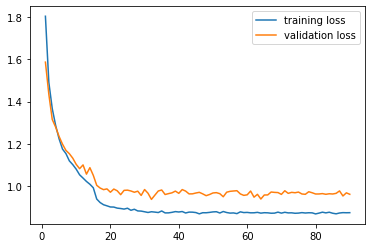

In [28]:
plt.figure()
plt.plot(np.arange(1,EPOCHS+1), losses3, label='training loss')
plt.plot(np.arange(1,EPOCHS+1), valid_losses3, label='validation loss')
plt.legend()
plt.show()

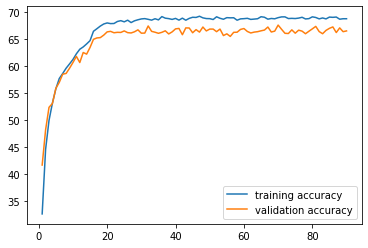

In [29]:
plt.figure()
plt.plot(np.arange(1,EPOCHS+1), accs3, label='training accuracy')
plt.plot(np.arange(1,EPOCHS+1), valid_accs3, label='validation accuracy')
plt.legend()
plt.show()

In [35]:
test(model3, testloader, device)

Accuracy of the network on 10000 test images: 65.6 %


In [36]:
from models import MobileNet4

In [37]:
model4 = MobileNet4(channels=[16,32,32,64,64,128]).to(device)

In [38]:
summary(model4, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]           1,200
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]             144
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 32, 32, 32]             512
       BatchNorm2d-8           [-1, 32, 32, 32]              64
              ReLU-9           [-1, 32, 32, 32]               0
        MaxPool2d-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]             288
      BatchNorm2d-12           [-1, 32, 16, 16]              64
             ReLU-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 32,

In [39]:
loss_ftn = nn.CrossEntropyLoss()

optimizer4 = optim.Adam(model4.parameters(), lr=0.01, weight_decay=0.0001)

scheduler4 = optim.lr_scheduler.LambdaLR(optimizer=optimizer4,
                                        lr_lambda=lambda epoch: lr_schedule(epoch) ,
                                        last_epoch=-1,
                                        verbose=True)

Adjusting learning rate of group 0 to 1.0000e-02.


In [40]:
EPOCHS=90

losses4, accs4, valid_losses4, valid_accs4 = train(model4, trainloader, validloader, EPOCHS, device, 
                                               loss_ftn, optimizer4, scheduler=scheduler4)

352it [00:06, 54.97it/s]


EPOCH 1 Completed. 
 Training Loss: 1.768, Training Accuracy: 36.03, Validation Loss: 1.506, Validation Accuracy: 45.00 

Adjusting learning rate of group 0 to 9.5000e-03.


352it [00:06, 55.21it/s]


EPOCH 2 Completed. 
 Training Loss: 1.385, Training Accuracy: 49.64, Validation Loss: 1.318, Validation Accuracy: 53.56 

Adjusting learning rate of group 0 to 9.0250e-03.


352it [00:06, 53.45it/s]


EPOCH 3 Completed. 
 Training Loss: 1.204, Training Accuracy: 56.58, Validation Loss: 1.163, Validation Accuracy: 58.54 

Adjusting learning rate of group 0 to 8.5737e-03.


352it [00:06, 53.16it/s]


EPOCH 4 Completed. 
 Training Loss: 1.092, Training Accuracy: 61.04, Validation Loss: 1.074, Validation Accuracy: 62.40 

Adjusting learning rate of group 0 to 8.1451e-03.


352it [00:06, 53.97it/s]


EPOCH 5 Completed. 
 Training Loss: 1.024, Training Accuracy: 63.46, Validation Loss: 1.017, Validation Accuracy: 64.54 

Adjusting learning rate of group 0 to 7.7378e-03.


352it [00:06, 53.80it/s]


EPOCH 6 Completed. 
 Training Loss: 0.971, Training Accuracy: 65.87, Validation Loss: 0.964, Validation Accuracy: 66.32 

Adjusting learning rate of group 0 to 7.3509e-03.


352it [00:06, 53.62it/s]


EPOCH 7 Completed. 
 Training Loss: 0.945, Training Accuracy: 66.46, Validation Loss: 0.982, Validation Accuracy: 66.16 

Adjusting learning rate of group 0 to 6.9834e-03.


352it [00:06, 54.28it/s]


EPOCH 8 Completed. 
 Training Loss: 0.910, Training Accuracy: 67.85, Validation Loss: 0.927, Validation Accuracy: 67.24 

Adjusting learning rate of group 0 to 6.6342e-03.


352it [00:06, 54.23it/s]


EPOCH 9 Completed. 
 Training Loss: 0.892, Training Accuracy: 68.56, Validation Loss: 0.928, Validation Accuracy: 68.06 

Adjusting learning rate of group 0 to 6.3025e-03.


352it [00:06, 54.24it/s]


EPOCH 10 Completed. 
 Training Loss: 0.865, Training Accuracy: 69.52, Validation Loss: 0.920, Validation Accuracy: 67.98 

Adjusting learning rate of group 0 to 5.9874e-03.


352it [00:06, 55.27it/s]


EPOCH 11 Completed. 
 Training Loss: 0.849, Training Accuracy: 70.11, Validation Loss: 0.924, Validation Accuracy: 68.00 

Adjusting learning rate of group 0 to 5.6880e-03.


352it [00:06, 54.86it/s]


EPOCH 12 Completed. 
 Training Loss: 0.832, Training Accuracy: 70.69, Validation Loss: 0.909, Validation Accuracy: 69.14 

Adjusting learning rate of group 0 to 5.4036e-03.


352it [00:06, 54.44it/s]


EPOCH 13 Completed. 
 Training Loss: 0.816, Training Accuracy: 71.26, Validation Loss: 0.910, Validation Accuracy: 70.00 

Adjusting learning rate of group 0 to 5.1334e-03.


352it [00:06, 52.74it/s]


EPOCH 14 Completed. 
 Training Loss: 0.799, Training Accuracy: 72.09, Validation Loss: 0.891, Validation Accuracy: 70.28 

Adjusting learning rate of group 0 to 4.8767e-03.


352it [00:06, 54.91it/s]


EPOCH 15 Completed. 
 Training Loss: 0.784, Training Accuracy: 72.36, Validation Loss: 0.870, Validation Accuracy: 70.38 

Adjusting learning rate of group 0 to 4.6329e-04.


352it [00:06, 54.16it/s]


EPOCH 16 Completed. 
 Training Loss: 0.720, Training Accuracy: 74.75, Validation Loss: 0.816, Validation Accuracy: 71.98 

Adjusting learning rate of group 0 to 4.4013e-04.


352it [00:06, 55.08it/s]


EPOCH 17 Completed. 
 Training Loss: 0.695, Training Accuracy: 75.69, Validation Loss: 0.813, Validation Accuracy: 72.56 

Adjusting learning rate of group 0 to 4.1812e-04.


352it [00:06, 54.95it/s]


EPOCH 18 Completed. 
 Training Loss: 0.683, Training Accuracy: 76.00, Validation Loss: 0.807, Validation Accuracy: 72.86 

Adjusting learning rate of group 0 to 3.9721e-04.


352it [00:06, 54.58it/s]


EPOCH 19 Completed. 
 Training Loss: 0.672, Training Accuracy: 76.48, Validation Loss: 0.805, Validation Accuracy: 72.52 

Adjusting learning rate of group 0 to 3.7735e-04.


352it [00:06, 54.06it/s]


EPOCH 20 Completed. 
 Training Loss: 0.671, Training Accuracy: 76.38, Validation Loss: 0.805, Validation Accuracy: 72.98 

Adjusting learning rate of group 0 to 3.5849e-04.


352it [00:06, 56.11it/s]


EPOCH 21 Completed. 
 Training Loss: 0.663, Training Accuracy: 76.90, Validation Loss: 0.809, Validation Accuracy: 72.72 

Adjusting learning rate of group 0 to 3.4056e-04.


352it [00:06, 57.29it/s]


EPOCH 22 Completed. 
 Training Loss: 0.660, Training Accuracy: 76.76, Validation Loss: 0.812, Validation Accuracy: 72.98 

Adjusting learning rate of group 0 to 3.2353e-04.


352it [00:05, 60.44it/s]


EPOCH 23 Completed. 
 Training Loss: 0.655, Training Accuracy: 76.81, Validation Loss: 0.831, Validation Accuracy: 72.72 

Adjusting learning rate of group 0 to 3.0736e-04.


352it [00:05, 60.55it/s]


EPOCH 24 Completed. 
 Training Loss: 0.658, Training Accuracy: 77.01, Validation Loss: 0.813, Validation Accuracy: 73.06 

Adjusting learning rate of group 0 to 2.9199e-04.


352it [00:05, 60.35it/s]


EPOCH 25 Completed. 
 Training Loss: 0.652, Training Accuracy: 77.10, Validation Loss: 0.807, Validation Accuracy: 72.64 

Adjusting learning rate of group 0 to 2.7739e-04.


352it [00:05, 60.23it/s]


EPOCH 26 Completed. 
 Training Loss: 0.648, Training Accuracy: 77.23, Validation Loss: 0.820, Validation Accuracy: 73.02 

Adjusting learning rate of group 0 to 2.6352e-04.


352it [00:05, 61.25it/s]


EPOCH 27 Completed. 
 Training Loss: 0.646, Training Accuracy: 77.28, Validation Loss: 0.802, Validation Accuracy: 73.70 

Adjusting learning rate of group 0 to 2.5034e-04.


352it [00:05, 59.54it/s]


EPOCH 28 Completed. 
 Training Loss: 0.642, Training Accuracy: 77.33, Validation Loss: 0.814, Validation Accuracy: 72.76 

Adjusting learning rate of group 0 to 2.3783e-04.


352it [00:05, 60.19it/s]


EPOCH 29 Completed. 
 Training Loss: 0.641, Training Accuracy: 77.39, Validation Loss: 0.807, Validation Accuracy: 73.16 

Adjusting learning rate of group 0 to 2.2594e-04.


352it [00:05, 61.35it/s]


EPOCH 30 Completed. 
 Training Loss: 0.639, Training Accuracy: 77.60, Validation Loss: 0.830, Validation Accuracy: 72.56 

Adjusting learning rate of group 0 to 2.1464e-05.


352it [00:05, 59.88it/s]


EPOCH 31 Completed. 
 Training Loss: 0.640, Training Accuracy: 77.70, Validation Loss: 0.813, Validation Accuracy: 73.38 

Adjusting learning rate of group 0 to 2.0391e-05.


352it [00:05, 60.50it/s]


EPOCH 32 Completed. 
 Training Loss: 0.635, Training Accuracy: 77.67, Validation Loss: 0.821, Validation Accuracy: 72.88 

Adjusting learning rate of group 0 to 1.9371e-05.


352it [00:05, 60.86it/s]


EPOCH 33 Completed. 
 Training Loss: 0.637, Training Accuracy: 77.62, Validation Loss: 0.806, Validation Accuracy: 73.68 

Adjusting learning rate of group 0 to 1.8403e-05.


352it [00:05, 60.70it/s]


EPOCH 34 Completed. 
 Training Loss: 0.632, Training Accuracy: 77.59, Validation Loss: 0.811, Validation Accuracy: 73.44 

Adjusting learning rate of group 0 to 1.7482e-05.


352it [00:05, 60.19it/s]


EPOCH 35 Completed. 
 Training Loss: 0.628, Training Accuracy: 77.91, Validation Loss: 0.807, Validation Accuracy: 73.66 

Adjusting learning rate of group 0 to 1.6608e-05.


352it [00:05, 59.24it/s]


EPOCH 36 Completed. 
 Training Loss: 0.635, Training Accuracy: 77.69, Validation Loss: 0.799, Validation Accuracy: 73.32 

Adjusting learning rate of group 0 to 1.5778e-05.


352it [00:05, 63.26it/s]


EPOCH 37 Completed. 
 Training Loss: 0.631, Training Accuracy: 77.65, Validation Loss: 0.819, Validation Accuracy: 73.30 

Adjusting learning rate of group 0 to 1.4989e-05.


352it [00:04, 76.89it/s]


EPOCH 38 Completed. 
 Training Loss: 0.630, Training Accuracy: 77.96, Validation Loss: 0.820, Validation Accuracy: 73.02 

Adjusting learning rate of group 0 to 1.4240e-05.


352it [00:06, 57.03it/s]


EPOCH 39 Completed. 
 Training Loss: 0.631, Training Accuracy: 77.69, Validation Loss: 0.820, Validation Accuracy: 72.90 

Adjusting learning rate of group 0 to 1.3528e-05.


352it [00:06, 54.60it/s]


EPOCH 40 Completed. 
 Training Loss: 0.631, Training Accuracy: 77.74, Validation Loss: 0.809, Validation Accuracy: 73.16 

Adjusting learning rate of group 0 to 1.2851e-05.


352it [00:06, 54.64it/s]


EPOCH 41 Completed. 
 Training Loss: 0.631, Training Accuracy: 77.79, Validation Loss: 0.803, Validation Accuracy: 72.94 

Adjusting learning rate of group 0 to 1.2209e-05.


352it [00:06, 54.64it/s]


EPOCH 42 Completed. 
 Training Loss: 0.629, Training Accuracy: 77.80, Validation Loss: 0.821, Validation Accuracy: 73.62 

Adjusting learning rate of group 0 to 1.1598e-05.


352it [00:06, 55.14it/s]


EPOCH 43 Completed. 
 Training Loss: 0.634, Training Accuracy: 77.72, Validation Loss: 0.791, Validation Accuracy: 73.64 

Adjusting learning rate of group 0 to 1.1018e-05.


352it [00:06, 55.21it/s]


EPOCH 44 Completed. 
 Training Loss: 0.633, Training Accuracy: 77.71, Validation Loss: 0.815, Validation Accuracy: 73.22 

Adjusting learning rate of group 0 to 1.0467e-05.


352it [00:06, 56.22it/s]


EPOCH 45 Completed. 
 Training Loss: 0.631, Training Accuracy: 77.94, Validation Loss: 0.821, Validation Accuracy: 73.58 

Adjusting learning rate of group 0 to 9.9440e-07.


352it [00:06, 53.92it/s]


EPOCH 46 Completed. 
 Training Loss: 0.628, Training Accuracy: 78.02, Validation Loss: 0.827, Validation Accuracy: 73.24 

Adjusting learning rate of group 0 to 9.4468e-07.


352it [00:06, 54.95it/s]


EPOCH 47 Completed. 
 Training Loss: 0.630, Training Accuracy: 77.83, Validation Loss: 0.814, Validation Accuracy: 72.94 

Adjusting learning rate of group 0 to 8.9745e-07.


352it [00:06, 55.48it/s]


EPOCH 48 Completed. 
 Training Loss: 0.634, Training Accuracy: 77.77, Validation Loss: 0.814, Validation Accuracy: 73.62 

Adjusting learning rate of group 0 to 8.5258e-07.


352it [00:06, 53.66it/s]


EPOCH 49 Completed. 
 Training Loss: 0.633, Training Accuracy: 77.80, Validation Loss: 0.813, Validation Accuracy: 72.66 

Adjusting learning rate of group 0 to 8.0995e-07.


352it [00:06, 54.77it/s]


EPOCH 50 Completed. 
 Training Loss: 0.629, Training Accuracy: 77.94, Validation Loss: 0.807, Validation Accuracy: 72.84 

Adjusting learning rate of group 0 to 7.6945e-07.


352it [00:06, 53.74it/s]


EPOCH 51 Completed. 
 Training Loss: 0.631, Training Accuracy: 77.54, Validation Loss: 0.819, Validation Accuracy: 73.88 

Adjusting learning rate of group 0 to 7.3098e-07.


352it [00:06, 55.48it/s]


EPOCH 52 Completed. 
 Training Loss: 0.624, Training Accuracy: 78.14, Validation Loss: 0.788, Validation Accuracy: 73.48 

Adjusting learning rate of group 0 to 6.9443e-07.


352it [00:06, 54.54it/s]


EPOCH 53 Completed. 
 Training Loss: 0.633, Training Accuracy: 77.74, Validation Loss: 0.813, Validation Accuracy: 73.06 

Adjusting learning rate of group 0 to 6.5971e-07.


352it [00:06, 54.54it/s]


EPOCH 54 Completed. 
 Training Loss: 0.634, Training Accuracy: 77.61, Validation Loss: 0.826, Validation Accuracy: 73.02 

Adjusting learning rate of group 0 to 6.2672e-07.


352it [00:06, 54.36it/s]


EPOCH 55 Completed. 
 Training Loss: 0.631, Training Accuracy: 77.85, Validation Loss: 0.803, Validation Accuracy: 73.38 

Adjusting learning rate of group 0 to 5.9539e-07.


352it [00:06, 54.08it/s]


EPOCH 56 Completed. 
 Training Loss: 0.631, Training Accuracy: 77.66, Validation Loss: 0.814, Validation Accuracy: 72.78 

Adjusting learning rate of group 0 to 5.6562e-07.


352it [00:07, 49.89it/s]


EPOCH 57 Completed. 
 Training Loss: 0.630, Training Accuracy: 77.79, Validation Loss: 0.799, Validation Accuracy: 73.02 

Adjusting learning rate of group 0 to 5.3734e-07.


352it [00:06, 55.31it/s]


EPOCH 58 Completed. 
 Training Loss: 0.630, Training Accuracy: 77.82, Validation Loss: 0.812, Validation Accuracy: 72.58 

Adjusting learning rate of group 0 to 5.1047e-07.


352it [00:06, 54.21it/s]


EPOCH 59 Completed. 
 Training Loss: 0.631, Training Accuracy: 77.60, Validation Loss: 0.810, Validation Accuracy: 73.56 

Adjusting learning rate of group 0 to 4.8495e-07.


352it [00:06, 54.71it/s]


EPOCH 60 Completed. 
 Training Loss: 0.634, Training Accuracy: 77.64, Validation Loss: 0.826, Validation Accuracy: 73.50 

Adjusting learning rate of group 0 to 4.6070e-08.


352it [00:06, 53.80it/s]


EPOCH 61 Completed. 
 Training Loss: 0.630, Training Accuracy: 77.85, Validation Loss: 0.802, Validation Accuracy: 73.38 

Adjusting learning rate of group 0 to 4.3766e-08.


352it [00:06, 52.30it/s]


EPOCH 62 Completed. 
 Training Loss: 0.631, Training Accuracy: 77.81, Validation Loss: 0.806, Validation Accuracy: 72.90 

Adjusting learning rate of group 0 to 4.1578e-08.


352it [00:06, 54.03it/s]


EPOCH 63 Completed. 
 Training Loss: 0.627, Training Accuracy: 78.02, Validation Loss: 0.812, Validation Accuracy: 73.58 

Adjusting learning rate of group 0 to 3.9499e-08.


352it [00:06, 56.07it/s]


EPOCH 64 Completed. 
 Training Loss: 0.633, Training Accuracy: 77.74, Validation Loss: 0.815, Validation Accuracy: 72.98 

Adjusting learning rate of group 0 to 3.7524e-08.


352it [00:05, 61.58it/s]


EPOCH 65 Completed. 
 Training Loss: 0.632, Training Accuracy: 77.71, Validation Loss: 0.788, Validation Accuracy: 73.20 

Adjusting learning rate of group 0 to 3.5648e-08.


352it [00:05, 61.46it/s]


EPOCH 66 Completed. 
 Training Loss: 0.631, Training Accuracy: 77.90, Validation Loss: 0.808, Validation Accuracy: 73.60 

Adjusting learning rate of group 0 to 3.3866e-08.


352it [00:05, 59.57it/s]


EPOCH 67 Completed. 
 Training Loss: 0.635, Training Accuracy: 77.62, Validation Loss: 0.819, Validation Accuracy: 72.88 

Adjusting learning rate of group 0 to 3.2172e-08.


352it [00:05, 60.08it/s]


EPOCH 68 Completed. 
 Training Loss: 0.626, Training Accuracy: 77.92, Validation Loss: 0.818, Validation Accuracy: 72.88 

Adjusting learning rate of group 0 to 3.0564e-08.


352it [00:05, 59.42it/s]


EPOCH 69 Completed. 
 Training Loss: 0.634, Training Accuracy: 77.46, Validation Loss: 0.811, Validation Accuracy: 73.10 

Adjusting learning rate of group 0 to 2.9035e-08.


352it [00:05, 62.29it/s]


EPOCH 70 Completed. 
 Training Loss: 0.632, Training Accuracy: 77.88, Validation Loss: 0.797, Validation Accuracy: 73.26 

Adjusting learning rate of group 0 to 2.7584e-08.


352it [00:05, 60.64it/s]


EPOCH 71 Completed. 
 Training Loss: 0.626, Training Accuracy: 78.10, Validation Loss: 0.806, Validation Accuracy: 73.26 

Adjusting learning rate of group 0 to 2.6205e-08.


352it [00:06, 57.62it/s]


EPOCH 72 Completed. 
 Training Loss: 0.632, Training Accuracy: 77.80, Validation Loss: 0.827, Validation Accuracy: 73.24 

Adjusting learning rate of group 0 to 2.4894e-08.


352it [00:05, 60.39it/s]


EPOCH 73 Completed. 
 Training Loss: 0.629, Training Accuracy: 77.89, Validation Loss: 0.798, Validation Accuracy: 72.94 

Adjusting learning rate of group 0 to 2.3650e-08.


352it [00:05, 63.73it/s]


EPOCH 74 Completed. 
 Training Loss: 0.628, Training Accuracy: 77.88, Validation Loss: 0.788, Validation Accuracy: 73.60 

Adjusting learning rate of group 0 to 2.2467e-08.


352it [00:05, 60.27it/s]


EPOCH 75 Completed. 
 Training Loss: 0.629, Training Accuracy: 77.97, Validation Loss: 0.806, Validation Accuracy: 73.14 

Adjusting learning rate of group 0 to 2.1344e-08.


352it [00:05, 60.42it/s]


EPOCH 76 Completed. 
 Training Loss: 0.633, Training Accuracy: 77.76, Validation Loss: 0.826, Validation Accuracy: 72.50 

Adjusting learning rate of group 0 to 2.0277e-08.


352it [00:06, 58.21it/s]


EPOCH 77 Completed. 
 Training Loss: 0.628, Training Accuracy: 77.85, Validation Loss: 0.809, Validation Accuracy: 73.40 

Adjusting learning rate of group 0 to 1.9263e-08.


352it [00:05, 61.10it/s]


EPOCH 78 Completed. 
 Training Loss: 0.625, Training Accuracy: 78.14, Validation Loss: 0.829, Validation Accuracy: 72.48 

Adjusting learning rate of group 0 to 1.8300e-08.


352it [00:05, 60.76it/s]


EPOCH 79 Completed. 
 Training Loss: 0.629, Training Accuracy: 77.92, Validation Loss: 0.811, Validation Accuracy: 73.64 

Adjusting learning rate of group 0 to 1.7385e-08.


352it [00:05, 60.59it/s]


EPOCH 80 Completed. 
 Training Loss: 0.631, Training Accuracy: 77.80, Validation Loss: 0.819, Validation Accuracy: 72.88 

Adjusting learning rate of group 0 to 1.6515e-08.


352it [00:04, 75.44it/s]


EPOCH 81 Completed. 
 Training Loss: 0.634, Training Accuracy: 77.78, Validation Loss: 0.828, Validation Accuracy: 72.96 

Adjusting learning rate of group 0 to 1.5690e-08.


352it [00:06, 58.40it/s]


EPOCH 82 Completed. 
 Training Loss: 0.631, Training Accuracy: 77.77, Validation Loss: 0.807, Validation Accuracy: 73.46 

Adjusting learning rate of group 0 to 1.4905e-08.


352it [00:06, 57.00it/s]


EPOCH 83 Completed. 
 Training Loss: 0.629, Training Accuracy: 78.04, Validation Loss: 0.820, Validation Accuracy: 73.10 

Adjusting learning rate of group 0 to 1.4160e-08.


352it [00:06, 56.80it/s]


EPOCH 84 Completed. 
 Training Loss: 0.627, Training Accuracy: 77.95, Validation Loss: 0.796, Validation Accuracy: 73.46 

Adjusting learning rate of group 0 to 1.3452e-08.


352it [00:06, 56.09it/s]


EPOCH 85 Completed. 
 Training Loss: 0.629, Training Accuracy: 77.85, Validation Loss: 0.825, Validation Accuracy: 72.52 

Adjusting learning rate of group 0 to 1.2779e-08.


352it [00:06, 55.02it/s]


EPOCH 86 Completed. 
 Training Loss: 0.630, Training Accuracy: 77.95, Validation Loss: 0.819, Validation Accuracy: 72.80 

Adjusting learning rate of group 0 to 1.2140e-08.


352it [00:06, 55.37it/s]


EPOCH 87 Completed. 
 Training Loss: 0.629, Training Accuracy: 77.86, Validation Loss: 0.814, Validation Accuracy: 73.08 

Adjusting learning rate of group 0 to 1.1533e-08.


352it [00:06, 54.76it/s]


EPOCH 88 Completed. 
 Training Loss: 0.632, Training Accuracy: 77.77, Validation Loss: 0.808, Validation Accuracy: 73.58 

Adjusting learning rate of group 0 to 1.0957e-08.


352it [00:06, 55.71it/s]


EPOCH 89 Completed. 
 Training Loss: 0.628, Training Accuracy: 77.86, Validation Loss: 0.816, Validation Accuracy: 73.16 

Adjusting learning rate of group 0 to 1.0409e-08.


352it [00:06, 55.99it/s]


EPOCH 90 Completed. 
 Training Loss: 0.627, Training Accuracy: 77.95, Validation Loss: 0.816, Validation Accuracy: 73.52 

Adjusting learning rate of group 0 to 9.8884e-10.


In [41]:
test(model4, testloader, device)

Accuracy of the network on 10000 test images: 72.95 %


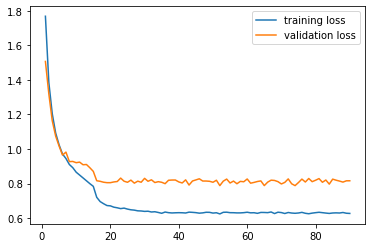

In [42]:
plt.figure()
plt.plot(np.arange(1,EPOCHS+1), losses4, label='training loss')
plt.plot(np.arange(1,EPOCHS+1), valid_losses4, label='validation loss')
plt.legend()
plt.show()

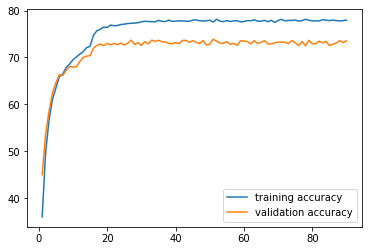

In [43]:
plt.figure()
plt.plot(np.arange(1,EPOCHS+1), accs4, label='training accuracy')
plt.plot(np.arange(1,EPOCHS+1), valid_accs4, label='validation accuracy')
plt.legend()
plt.show()